In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: IBM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


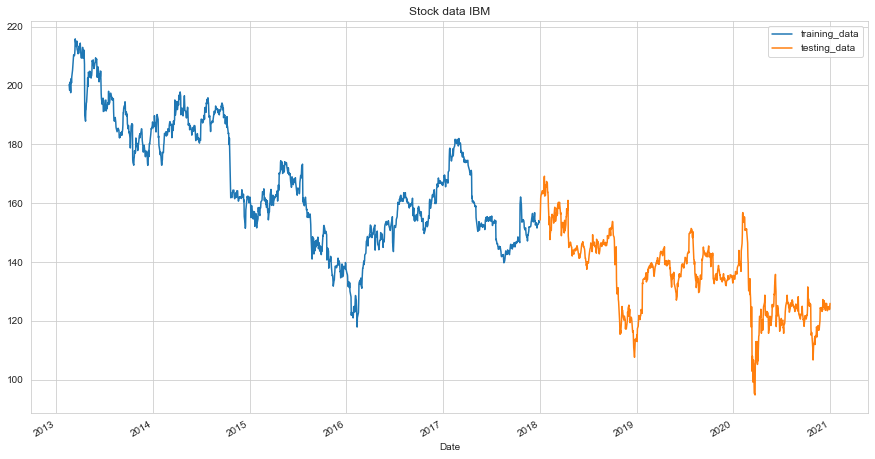

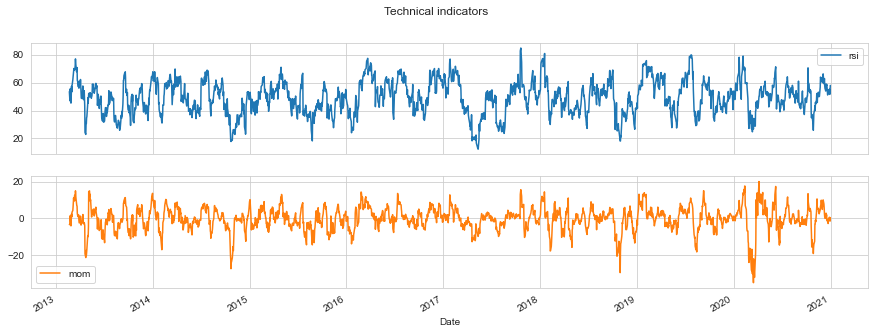

In [2]:
stock_name = 'ibm'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1043.58, duration: 0:00:00.220260
episode: 2/2000, episode end value: 992.54, duration: 0:00:00.220036
episode: 3/2000, episode end value: 980.20, duration: 0:00:00.218837
episode: 4/2000, episode end value: 994.11, duration: 0:00:00.233808
episode: 5/2000, episode end value: 985.51, duration: 0:00:00.252190
episode: 6/2000, episode end value: 991.62, duration: 0:00:00.295066
episode: 7/2000, episode end value: 980.89, duration: 0:00:00.247807
episode: 8/2000, episode end value: 983.62, duration: 0:00:00.248255
episode: 9/2000, episode end value: 1008.37, duration: 0:00:00.272333
episode: 10/2000, episode end value: 991.38, duration: 0:00:00.249456
episode: 11/2000, episode end value: 1019.74, duration: 0:00:00.281401
episode: 12/2000, episode end value: 1007.96, duration: 0:00:00.272940
episode: 13/2000, episode end value: 994.80, duration: 0:00:00.269048
episode: 14/2000, episode end value: 993.34, duration: 0:00:00.264063
episode: 15/2000, episode

episode: 118/2000, episode end value: 1008.25, duration: 0:00:00.536520
episode: 119/2000, episode end value: 1004.78, duration: 0:00:00.386118
episode: 120/2000, episode end value: 990.41, duration: 0:00:00.406152
episode: 121/2000, episode end value: 990.12, duration: 0:00:00.342035
episode: 122/2000, episode end value: 1036.28, duration: 0:00:00.313859
episode: 123/2000, episode end value: 995.61, duration: 0:00:00.378351
episode: 124/2000, episode end value: 1041.20, duration: 0:00:00.277089
episode: 125/2000, episode end value: 974.28, duration: 0:00:00.427501
episode: 126/2000, episode end value: 1016.81, duration: 0:00:00.397483
episode: 127/2000, episode end value: 992.67, duration: 0:00:00.420331
episode: 128/2000, episode end value: 989.75, duration: 0:00:00.387698
episode: 129/2000, episode end value: 1056.26, duration: 0:00:00.375224
episode: 130/2000, episode end value: 1023.01, duration: 0:00:00.307745
episode: 131/2000, episode end value: 998.87, duration: 0:00:00.390751

episode: 233/2000, episode end value: 989.41, duration: 0:00:00.403184
episode: 234/2000, episode end value: 1003.38, duration: 0:00:00.333779
episode: 235/2000, episode end value: 983.38, duration: 0:00:00.444259
episode: 236/2000, episode end value: 980.26, duration: 0:00:00.469525
episode: 237/2000, episode end value: 994.76, duration: 0:00:00.404675
episode: 238/2000, episode end value: 1019.62, duration: 0:00:00.389527
episode: 239/2000, episode end value: 982.69, duration: 0:00:00.392198
episode: 240/2000, episode end value: 992.02, duration: 0:00:00.390369
episode: 241/2000, episode end value: 1064.46, duration: 0:00:00.376058
episode: 242/2000, episode end value: 1008.00, duration: 0:00:00.374666
episode: 243/2000, episode end value: 992.38, duration: 0:00:00.397862
episode: 244/2000, episode end value: 1005.65, duration: 0:00:00.340573
episode: 245/2000, episode end value: 1025.52, duration: 0:00:00.410951
episode: 246/2000, episode end value: 1024.61, duration: 0:00:00.456598

episode: 348/2000, episode end value: 989.16, duration: 0:00:00.451007
episode: 349/2000, episode end value: 982.04, duration: 0:00:00.398532
episode: 350/2000, episode end value: 993.69, duration: 0:00:00.407670
episode: 351/2000, episode end value: 1007.74, duration: 0:00:00.342778
episode: 352/2000, episode end value: 990.90, duration: 0:00:00.368112
episode: 353/2000, episode end value: 995.25, duration: 0:00:00.368166
episode: 354/2000, episode end value: 986.28, duration: 0:00:00.420692
episode: 355/2000, episode end value: 1026.89, duration: 0:00:00.409433
episode: 356/2000, episode end value: 978.71, duration: 0:00:00.427416
episode: 357/2000, episode end value: 981.77, duration: 0:00:00.386641
episode: 358/2000, episode end value: 1021.13, duration: 0:00:00.413173
episode: 359/2000, episode end value: 987.75, duration: 0:00:00.331341
episode: 360/2000, episode end value: 981.51, duration: 0:00:00.477630
episode: 361/2000, episode end value: 999.22, duration: 0:00:00.380656
epi

episode: 463/2000, episode end value: 1007.93, duration: 0:00:00.367385
episode: 464/2000, episode end value: 1002.80, duration: 0:00:00.383864
episode: 465/2000, episode end value: 1019.48, duration: 0:00:00.333950
episode: 466/2000, episode end value: 1008.71, duration: 0:00:00.427724
episode: 467/2000, episode end value: 1022.70, duration: 0:00:00.379077
episode: 468/2000, episode end value: 989.38, duration: 0:00:00.350435
episode: 469/2000, episode end value: 1000.48, duration: 0:00:00.363990
episode: 470/2000, episode end value: 994.82, duration: 0:00:00.467266
episode: 471/2000, episode end value: 1036.28, duration: 0:00:00.421431
episode: 472/2000, episode end value: 1001.90, duration: 0:00:00.321030
episode: 473/2000, episode end value: 1013.60, duration: 0:00:00.365636
episode: 474/2000, episode end value: 1009.48, duration: 0:00:00.428813
episode: 475/2000, episode end value: 1012.52, duration: 0:00:00.348645
episode: 476/2000, episode end value: 1039.90, duration: 0:00:00.4

episode: 578/2000, episode end value: 994.04, duration: 0:00:00.410064
episode: 579/2000, episode end value: 989.15, duration: 0:00:00.442527
episode: 580/2000, episode end value: 1000.33, duration: 0:00:00.343298
episode: 581/2000, episode end value: 997.49, duration: 0:00:00.350328
episode: 582/2000, episode end value: 987.54, duration: 0:00:00.335161
episode: 583/2000, episode end value: 1027.49, duration: 0:00:00.304459
episode: 584/2000, episode end value: 982.25, duration: 0:00:00.379830
episode: 585/2000, episode end value: 984.62, duration: 0:00:00.324785
episode: 586/2000, episode end value: 990.15, duration: 0:00:00.346656
episode: 587/2000, episode end value: 985.36, duration: 0:00:00.328761
episode: 588/2000, episode end value: 1015.99, duration: 0:00:00.354294
episode: 589/2000, episode end value: 1002.10, duration: 0:00:00.445789
episode: 590/2000, episode end value: 983.21, duration: 0:00:00.371796
episode: 591/2000, episode end value: 1039.42, duration: 0:00:00.419381
e

episode: 693/2000, episode end value: 991.95, duration: 0:00:00.410669
episode: 694/2000, episode end value: 1055.93, duration: 0:00:00.330434
episode: 695/2000, episode end value: 1037.25, duration: 0:00:00.433431
episode: 696/2000, episode end value: 988.96, duration: 0:00:00.348195
episode: 697/2000, episode end value: 1025.81, duration: 0:00:00.348540
episode: 698/2000, episode end value: 987.22, duration: 0:00:00.350825
episode: 699/2000, episode end value: 1005.41, duration: 0:00:00.394934
episode: 700/2000, episode end value: 982.60, duration: 0:00:00.448286
episode: 701/2000, episode end value: 1009.95, duration: 0:00:00.377965
episode: 702/2000, episode end value: 1029.30, duration: 0:00:00.372215
episode: 703/2000, episode end value: 988.06, duration: 0:00:00.374130
episode: 704/2000, episode end value: 1006.10, duration: 0:00:00.376634
episode: 705/2000, episode end value: 984.81, duration: 0:00:00.386535
episode: 706/2000, episode end value: 1042.88, duration: 0:00:00.35842

episode: 808/2000, episode end value: 1004.47, duration: 0:00:00.382677
episode: 809/2000, episode end value: 981.62, duration: 0:00:00.431293
episode: 810/2000, episode end value: 1008.75, duration: 0:00:00.334925
episode: 811/2000, episode end value: 981.70, duration: 0:00:00.345881
episode: 812/2000, episode end value: 992.88, duration: 0:00:00.417178
episode: 813/2000, episode end value: 992.63, duration: 0:00:00.430211
episode: 814/2000, episode end value: 1001.03, duration: 0:00:00.344166
episode: 815/2000, episode end value: 1028.08, duration: 0:00:00.378252
episode: 816/2000, episode end value: 1006.73, duration: 0:00:00.362834
episode: 817/2000, episode end value: 986.75, duration: 0:00:00.414767
episode: 818/2000, episode end value: 1004.54, duration: 0:00:00.374257
episode: 819/2000, episode end value: 997.13, duration: 0:00:00.398103
episode: 820/2000, episode end value: 998.44, duration: 0:00:00.364623
episode: 821/2000, episode end value: 1010.68, duration: 0:00:00.389374

episode: 923/2000, episode end value: 984.97, duration: 0:00:00.390189
episode: 924/2000, episode end value: 984.52, duration: 0:00:00.372317
episode: 925/2000, episode end value: 999.39, duration: 0:00:00.393707
episode: 926/2000, episode end value: 1000.07, duration: 0:00:00.343637
episode: 927/2000, episode end value: 1014.14, duration: 0:00:00.339038
episode: 928/2000, episode end value: 1044.30, duration: 0:00:00.422609
episode: 929/2000, episode end value: 1022.76, duration: 0:00:00.336044
episode: 930/2000, episode end value: 1021.91, duration: 0:00:00.319894
episode: 931/2000, episode end value: 997.46, duration: 0:00:00.422730
episode: 932/2000, episode end value: 1023.21, duration: 0:00:00.333758
episode: 933/2000, episode end value: 1047.80, duration: 0:00:00.340748
episode: 934/2000, episode end value: 1003.69, duration: 0:00:00.443463
episode: 935/2000, episode end value: 990.07, duration: 0:00:00.343058
episode: 936/2000, episode end value: 1032.50, duration: 0:00:00.3994

episode: 1038/2000, episode end value: 985.11, duration: 0:00:00.398850
episode: 1039/2000, episode end value: 987.54, duration: 0:00:00.452675
episode: 1040/2000, episode end value: 1034.60, duration: 0:00:00.324352
episode: 1041/2000, episode end value: 1025.69, duration: 0:00:00.364288
episode: 1042/2000, episode end value: 987.76, duration: 0:00:00.403153
episode: 1043/2000, episode end value: 1035.08, duration: 0:00:00.454786
episode: 1044/2000, episode end value: 986.54, duration: 0:00:00.352031
episode: 1045/2000, episode end value: 989.96, duration: 0:00:00.381959
episode: 1046/2000, episode end value: 1018.88, duration: 0:00:00.341511
episode: 1047/2000, episode end value: 981.42, duration: 0:00:00.336126
episode: 1048/2000, episode end value: 994.73, duration: 0:00:00.307066
episode: 1049/2000, episode end value: 1058.08, duration: 0:00:00.366601
episode: 1050/2000, episode end value: 1026.51, duration: 0:00:00.342932
episode: 1051/2000, episode end value: 1034.51, duration: 

episode: 1152/2000, episode end value: 1060.92, duration: 0:00:00.429181
episode: 1153/2000, episode end value: 986.60, duration: 0:00:00.331266
episode: 1154/2000, episode end value: 990.61, duration: 0:00:00.433748
episode: 1155/2000, episode end value: 1055.56, duration: 0:00:00.331789
episode: 1156/2000, episode end value: 991.04, duration: 0:00:00.384272
episode: 1157/2000, episode end value: 988.68, duration: 0:00:00.419959
episode: 1158/2000, episode end value: 990.73, duration: 0:00:00.367286
episode: 1159/2000, episode end value: 1041.73, duration: 0:00:00.320567
episode: 1160/2000, episode end value: 1031.03, duration: 0:00:00.392045
episode: 1161/2000, episode end value: 983.70, duration: 0:00:00.347947
episode: 1162/2000, episode end value: 1003.72, duration: 0:00:00.339540
episode: 1163/2000, episode end value: 1003.22, duration: 0:00:00.354913
episode: 1164/2000, episode end value: 992.52, duration: 0:00:00.415826
episode: 1165/2000, episode end value: 1007.18, duration: 

episode: 1266/2000, episode end value: 978.26, duration: 0:00:00.351860
episode: 1267/2000, episode end value: 981.03, duration: 0:00:00.456397
episode: 1268/2000, episode end value: 984.81, duration: 0:00:00.347633
episode: 1269/2000, episode end value: 981.30, duration: 0:00:00.439588
episode: 1270/2000, episode end value: 1005.74, duration: 0:00:00.393137
episode: 1271/2000, episode end value: 1005.25, duration: 0:00:00.333191
episode: 1272/2000, episode end value: 989.04, duration: 0:00:00.383885
episode: 1273/2000, episode end value: 1005.47, duration: 0:00:00.395273
episode: 1274/2000, episode end value: 981.80, duration: 0:00:00.414265
episode: 1275/2000, episode end value: 985.31, duration: 0:00:00.350373
episode: 1276/2000, episode end value: 1054.06, duration: 0:00:00.360998
episode: 1277/2000, episode end value: 992.62, duration: 0:00:00.391042
episode: 1278/2000, episode end value: 985.90, duration: 0:00:00.340225
episode: 1279/2000, episode end value: 998.56, duration: 0:0

episode: 1380/2000, episode end value: 1041.06, duration: 0:00:00.447724
episode: 1381/2000, episode end value: 993.96, duration: 0:00:00.446242
episode: 1382/2000, episode end value: 981.32, duration: 0:00:00.405234
episode: 1383/2000, episode end value: 977.99, duration: 0:00:00.399521
episode: 1384/2000, episode end value: 989.71, duration: 0:00:00.383147
episode: 1385/2000, episode end value: 981.54, duration: 0:00:00.391807
episode: 1386/2000, episode end value: 1019.90, duration: 0:00:00.403446
episode: 1387/2000, episode end value: 1036.69, duration: 0:00:00.398702
episode: 1388/2000, episode end value: 1008.33, duration: 0:00:00.492926
episode: 1389/2000, episode end value: 1015.64, duration: 0:00:00.412239
episode: 1390/2000, episode end value: 995.01, duration: 0:00:00.438976
episode: 1391/2000, episode end value: 1000.49, duration: 0:00:00.362611
episode: 1392/2000, episode end value: 992.33, duration: 0:00:00.366216
episode: 1393/2000, episode end value: 1030.84, duration: 

episode: 1494/2000, episode end value: 1001.55, duration: 0:00:00.430625
episode: 1495/2000, episode end value: 981.72, duration: 0:00:00.415267
episode: 1496/2000, episode end value: 1005.15, duration: 0:00:00.375366
episode: 1497/2000, episode end value: 989.21, duration: 0:00:00.356498
episode: 1498/2000, episode end value: 1004.17, duration: 0:00:00.331947
episode: 1499/2000, episode end value: 1045.31, duration: 0:00:00.381092
episode: 1500/2000, episode end value: 979.56, duration: 0:00:00.341321
episode: 1501/2000, episode end value: 988.35, duration: 0:00:00.307831
episode: 1502/2000, episode end value: 1056.74, duration: 0:00:00.372786
episode: 1503/2000, episode end value: 982.41, duration: 0:00:00.332207
episode: 1504/2000, episode end value: 981.28, duration: 0:00:00.401146
episode: 1505/2000, episode end value: 978.10, duration: 0:00:00.349407
episode: 1506/2000, episode end value: 1007.76, duration: 0:00:00.331185
episode: 1507/2000, episode end value: 1011.33, duration: 

episode: 1608/2000, episode end value: 991.64, duration: 0:00:00.329551
episode: 1609/2000, episode end value: 993.48, duration: 0:00:00.454177
episode: 1610/2000, episode end value: 1003.60, duration: 0:00:00.426797
episode: 1611/2000, episode end value: 1014.61, duration: 0:00:00.409815
episode: 1612/2000, episode end value: 978.09, duration: 0:00:00.358628
episode: 1613/2000, episode end value: 986.97, duration: 0:00:00.403519
episode: 1614/2000, episode end value: 990.97, duration: 0:00:00.459727
episode: 1615/2000, episode end value: 982.71, duration: 0:00:00.346528
episode: 1616/2000, episode end value: 1017.56, duration: 0:00:00.367521
episode: 1617/2000, episode end value: 981.86, duration: 0:00:00.390313
episode: 1618/2000, episode end value: 984.93, duration: 0:00:00.383981
episode: 1619/2000, episode end value: 979.27, duration: 0:00:00.329593
episode: 1620/2000, episode end value: 991.02, duration: 0:00:00.501367
episode: 1621/2000, episode end value: 984.18, duration: 0:00

episode: 1722/2000, episode end value: 1019.63, duration: 0:00:00.424557
episode: 1723/2000, episode end value: 1016.91, duration: 0:00:00.414573
episode: 1724/2000, episode end value: 984.41, duration: 0:00:00.359029
episode: 1725/2000, episode end value: 1032.85, duration: 0:00:00.300732
episode: 1726/2000, episode end value: 1038.51, duration: 0:00:00.323791
episode: 1727/2000, episode end value: 1053.10, duration: 0:00:00.383128
episode: 1728/2000, episode end value: 1021.28, duration: 0:00:00.349664
episode: 1729/2000, episode end value: 994.41, duration: 0:00:00.367356
episode: 1730/2000, episode end value: 979.59, duration: 0:00:00.295097
episode: 1731/2000, episode end value: 981.56, duration: 0:00:00.337453
episode: 1732/2000, episode end value: 1019.69, duration: 0:00:00.419492
episode: 1733/2000, episode end value: 1018.79, duration: 0:00:00.408012
episode: 1734/2000, episode end value: 986.33, duration: 0:00:00.369943
episode: 1735/2000, episode end value: 999.31, duration:

episode: 1836/2000, episode end value: 1008.01, duration: 0:00:00.360886
episode: 1837/2000, episode end value: 998.63, duration: 0:00:00.397356
episode: 1838/2000, episode end value: 995.36, duration: 0:00:00.359250
episode: 1839/2000, episode end value: 1015.33, duration: 0:00:00.370219
episode: 1840/2000, episode end value: 978.30, duration: 0:00:00.382401
episode: 1841/2000, episode end value: 980.65, duration: 0:00:00.395672
episode: 1842/2000, episode end value: 981.97, duration: 0:00:00.442373
episode: 1843/2000, episode end value: 1023.27, duration: 0:00:00.370669
episode: 1844/2000, episode end value: 988.12, duration: 0:00:00.411883
episode: 1845/2000, episode end value: 991.24, duration: 0:00:00.346287
episode: 1846/2000, episode end value: 982.17, duration: 0:00:00.345509
episode: 1847/2000, episode end value: 1012.00, duration: 0:00:00.428969
episode: 1848/2000, episode end value: 1015.98, duration: 0:00:00.346264
episode: 1849/2000, episode end value: 980.79, duration: 0:

episode: 1950/2000, episode end value: 990.55, duration: 0:00:00.271466
episode: 1951/2000, episode end value: 1043.57, duration: 0:00:00.278921
episode: 1952/2000, episode end value: 1036.12, duration: 0:00:00.256584
episode: 1953/2000, episode end value: 980.63, duration: 0:00:00.260721
episode: 1954/2000, episode end value: 987.02, duration: 0:00:00.291393
episode: 1955/2000, episode end value: 983.82, duration: 0:00:00.278434
episode: 1956/2000, episode end value: 999.21, duration: 0:00:00.259873
episode: 1957/2000, episode end value: 998.02, duration: 0:00:00.301832
episode: 1958/2000, episode end value: 991.70, duration: 0:00:00.274482
episode: 1959/2000, episode end value: 1051.86, duration: 0:00:00.303258
episode: 1960/2000, episode end value: 985.77, duration: 0:00:00.265757
episode: 1961/2000, episode end value: 1006.08, duration: 0:00:00.289124
episode: 1962/2000, episode end value: 1006.74, duration: 0:00:00.276084
episode: 1963/2000, episode end value: 1003.42, duration: 0

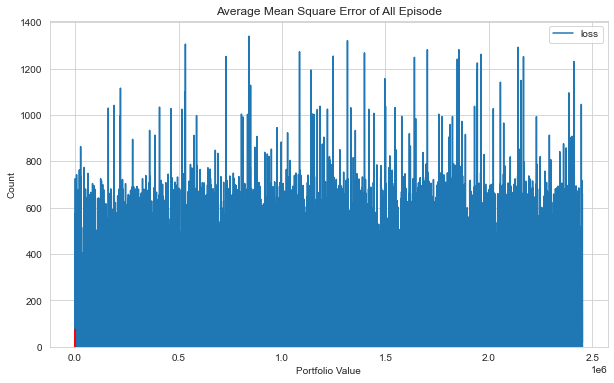

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

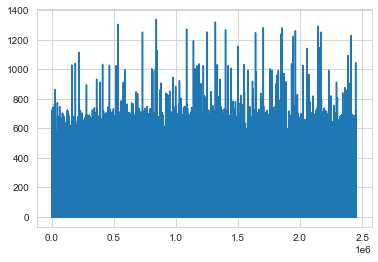

In [5]:
plt.plot(agent.model.losses)

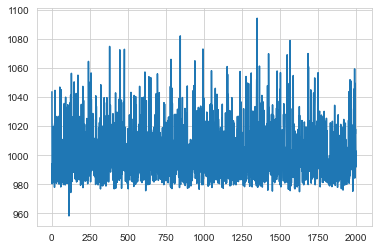

In [6]:
plt.plot(portfolio_value)

episode end value: 979.10, duration: 0:00:00.081950
Sell: 53 times, Buy: 52 times


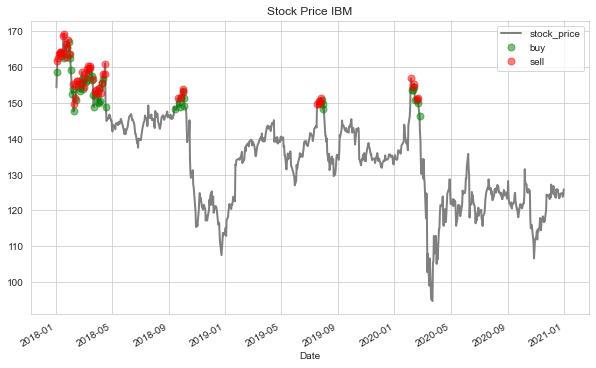

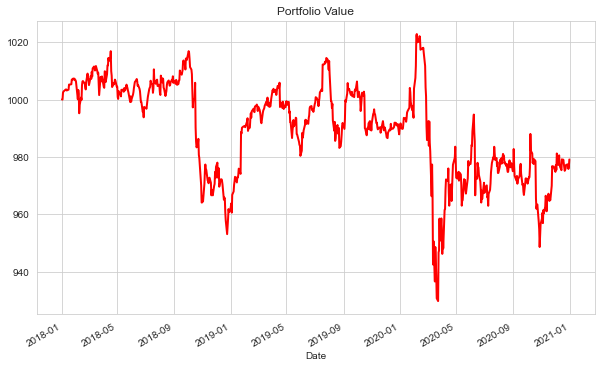

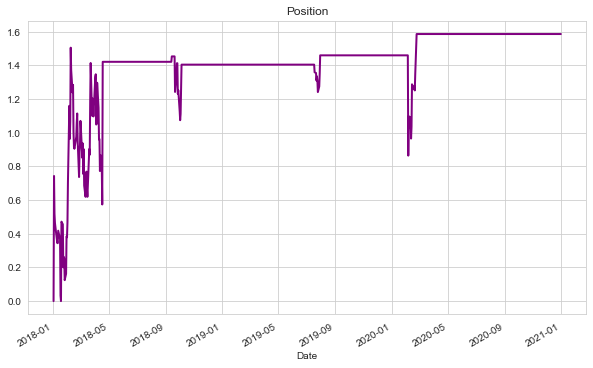

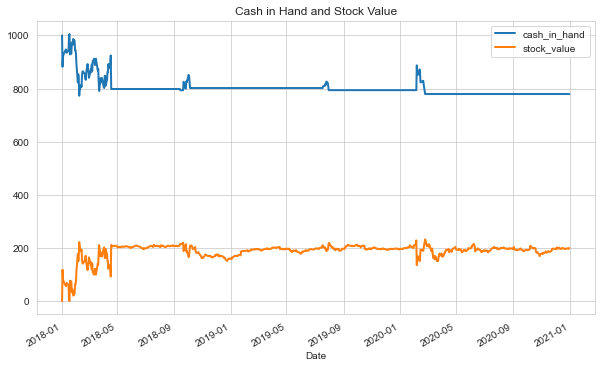

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: IBM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -0.70 %
Volatility: 0.0564
shape ratio: -0.3195
Maximun drawdown: -9.10 %
Calmar ratio: -0.0771
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -6.55 %
Volatility (benchmark): 0.3010
shape ratio: -0.2542
Maximun drawdown: -43.96 %
Calmar ratio (benchmark): -0.1490


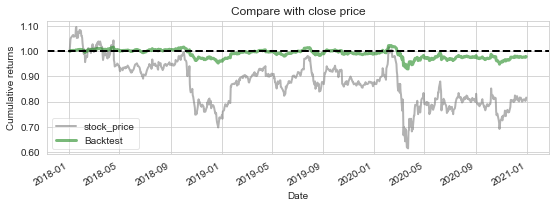

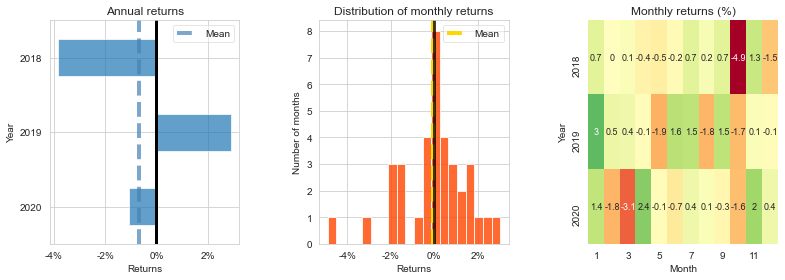

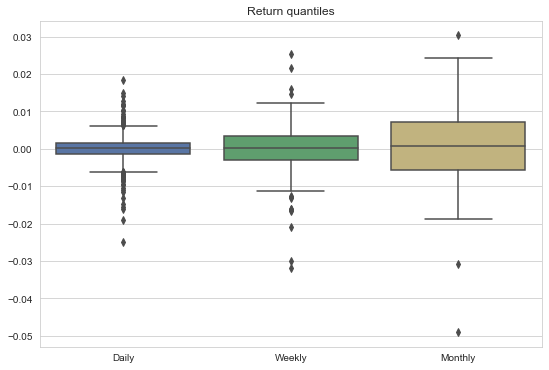

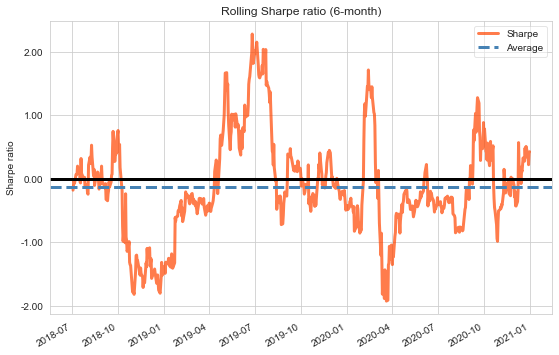

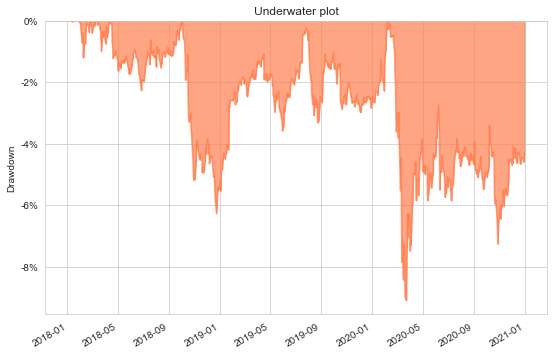

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')